<a href="https://colab.research.google.com/github/tiyasadey3/GEN_AI/blob/main/Image_Analyzer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install --ignore-installed -q crewai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.2/67.2 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 kB 375.9 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 5.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.2/48.2 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.4/72.4 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.2/320.2 kB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 108.6 MB

In [2]:
!pip install -q langchain langchain_community langchain-openai pillow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 21.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.4/63.4 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.5/438.5 kB 22.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 5.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.6 which is incompatible.


In [3]:
!pip install colab-xterm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.6/115.6 kB 4.6 MB/s eta 0:00:00


In [4]:
%load_ext colabxterm

In [5]:
%xterm

Launching Xterm...

<IPython.core.display.Javascript object>

In [25]:
from crewai import Agent, Task, Crew
from crewai.process import Process
from langchain.llms import Ollama
from PIL import Image
from google.colab import files
from IPython.display import display

In [26]:
# Load the LLaMA 3 model
llm = Ollama(model='ollama/llama3.2')

Saving image2.jpeg to image2 (1).jpeg


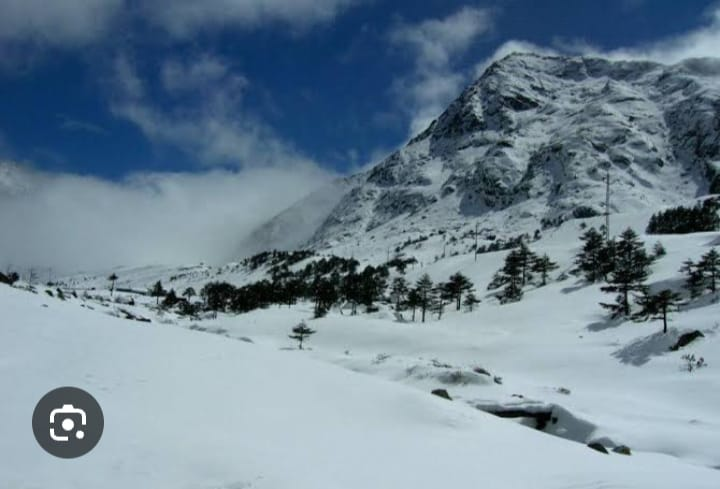

In [29]:
# Upload image
uploaded = files.upload()
image_path = list(uploaded.keys())[0]
img = Image.open('/content/image2.jpeg')
display(img)

In [30]:
# Agents

image_analyst = Agent(
    role="Image Analyst",
    goal="Analyze the visual elements of the image such as color, composition, and theme",
    backstory="You're an expert in visual arts and computer vision, skilled at interpreting scenes and emotions in images.",
    llm=llm,
    allow_delegation=False,
    verbose=False
)

object_detector = Agent(
    role="Object Detector",
    goal="Identify major objects and subjects in the uploaded image",
    backstory="You specialize in recognizing and naming objects, people, animals, and background elements within a scene.",
    llm=llm,
    allow_delegation=False,
    verbose=False
)

alt_text_writer = Agent(
    role="Alt-Text Writer",
    goal="Generate concise, clear alt text for screen readers",
    backstory="You write descriptive alt-text for accessibility, focusing on clarity and brevity while capturing the image essence.",
    llm=llm,
    allow_delegation=False,
    verbose=False
)

caption_creator = Agent(
    role="Caption Creator",
    goal="Create a catchy and creative caption for the image",
    backstory="You're a witty wordsmith and social media expert who knows how to make an image go viral with the perfect caption.",
    llm=llm,
    allow_delegation=False,
    verbose=False
)

In [31]:
# Tasks

analysis_task = Task(
    description=f"Describe the visual style and emotions of the uploaded image ({'/content/image1.jpeg'}).",
    agent=image_analyst,
    expected_output="An analysis of the image's artistic style, mood, and visual themes."
)

detection_task = Task(
    description=f"Identify and list all key objects and elements present in the image ({'/content/image1.jpeg'}).",
    agent=object_detector,
    expected_output="A list of prominent objects, background elements, and features in the image."
)

alt_text_task = Task(
    description=f"Write alt-text for the image file ({'/content/image1.jpeg'}) for accessibility purposes.",
    agent=alt_text_writer,
    expected_output="A one-sentence alt-text describing the image clearly and accurately."
)

caption_task = Task(
    description=f"Create a fun, catchy caption suitable for sharing the image ({'/content/image1.jpeg'}) on social media.",
    agent=caption_creator,
    expected_output="A caption that fits the image's mood and content, optimized for engagement."
)


In [32]:
# Assemble the crew

image_crew = Crew(
    agents=[image_analyst, object_detector, alt_text_writer, caption_creator],
    tasks=[analysis_task, detection_task, alt_text_task, caption_task],
    verbose=0,
    process=Process.sequential
)

In [33]:
# Run the Crew
result = image_crew.kickoff()
print(result)

"Finding solace in nature's embrace. Serenity found in every breath of this tranquil landscape, where the beauty of the world slows us down and reminds us of life's preciousness. #NatureLovers #SerenityNow #TranquilityFound"
